In [ ]:
# How data is collected?
# randomly pick a time every hour to sample 100 or less tweets that contains .gif
# use twint library
# twint search setting: 
# c = twint.Config()
# c.Search = ".gif"
# c.Limit = "100"
# c.Pandas = True
# c.Lang = "en"
# c.Store_csv = True

#How are data preprocessed?
# 1. Remove the first 100 repetitive data
# 2. Extract only the data that are in English using googletrans
# 3. Count Number of New and Reply
# 4. Count the distribution of tweets length


In [ ]:
pip install googletrans==4.0.0rc1

In [ ]:
from googletrans import Translator
translator = Translator()
p = translator.detect('この文章は日本語で書かれました。')
print(p.lang)

In [4]:
import pandas as pd

df = pd.read_csv('sample.csv')

df = df[100:]
df = df[df['language'] == 'en']

df
#df[df['language'] == 'en']['tweet'][1]


,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
101,101,1431097935996067840,1431097935996067840,1.630035e+12,2021-08-26 23:35:11,-400,NaN,Of course Colleen Clinkenbeard voices Elsie Cr...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
102,102,1431097935865942020,1431097935865942020,1.630035e+12,2021-08-26 23:35:11,-400,NaN,I still have an unhealthy crush on Johnny Lawr...,en,['cobrakai'],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
103,103,1431097935790366720,1431097027270569988,1.630035e+12,2021-08-26 23:35:11,-400,NaN,@hueningkey so u visited my acc to see if my h...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'hueningkey', 'name': '🏴\u200...",NaN,NaN,NaN,NaN
104,104,1431097935756996613,1430946476901998596,1.630035e+12,2021-08-26 23:35:11,-400,NaN,@selfself_boss I will love that https://t.co/...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'selfself_boss', 'name': 'fer...",NaN,NaN,NaN,NaN
105,105,1431097935580782594,1431094715559055361,1.630035e+12,2021-08-26 23:35:11,-400,NaN,@JodyAdle @JacksonSull3 @alboy88 @Mafialifefra...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'JodyAdle', 'name': 'Jody Woo...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14053,1996,1431244476249526273,1431194981876867073,1.630070e+12,2021-08-27 09:17:29,-400,NaN,@meredithfox22 Got to love a pet-related quilt...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'meredithfox22', 'name': 'Jo ...",NaN,NaN,NaN,NaN
14054,1997,1431244476106870784,1431243583277912068,1.630070e+12,2021-08-27 09:17:28,-400,NaN,@ShardiB2 Got it! Good moorning Shardi!🔥 http...,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'ShardiB2', 'name': ""Don't fo...",NaN,NaN,NaN,NaN
14056,1999,1431244475993665538,1431244475993665538,1.630070e+12,2021-08-27 09:17:28,-400,NaN,One last dance boy❤️ https://t.co/X3xX8nwxP0,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
14058,2001,1431244475876220937,1431198953274548229,1.630070e+12,2021-08-27 09:17:28,-400,NaN,@coaldragon @RosenbergJudith @BrendaMSelwyn WH...,en,['thearchers'],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'coaldragon', 'name': '🌿 Jen ...",NaN,NaN,NaN,NaN


In [4]:
import re
import emoji
import pandas as pd
filename = 'sample-original.csv'


True     6733
False    5844
Name: reply, dtype: int64
0     907
20    669
15    662
17    651
19    649
2     646
14    641
12    641
16    637
22    634
10    619
23    616
21    610
13    598
11    582
9     566
18    558
3     554
8     521
1     352
6     264
Name: hour, dtype: int64


array([<AxesSubplot:title={'center':'False'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

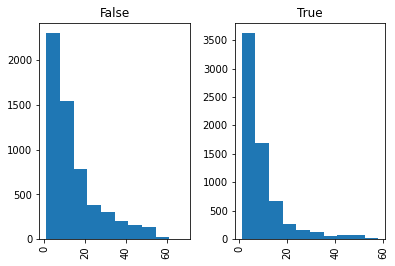

In [18]:





def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    return tweet

def length(tw):
    return len(tw.split())


df = pd.read_csv(filename) 

df = df[2018:]
df = df[df['language'] == 'en']

df['clean_tw'] = df['tweet'].map(lambda x: cleaner(x))

    

df = df[df['photos'] != '[]'] #drop wrong search results with words gif instead of actually gif
df['reply'] = df['reply_to'] != '[]' #check if it is reply by checking if reply to user id is empty
df['length'] = df['clean_tw'].map(lambda x: length(x))


df.to_csv('ps-'+filename)

print(df['reply'].value_counts())
print(df['hour'].value_counts())


df['length'].hist(by=df['reply'])

0     907
20    669
15    662
17    651
19    649
2     646
14    641
12    641
16    637
22    634
10    619
23    616
21    610
13    598
11    582
9     566
18    558
3     554
8     521
1     352
6     264
Name: hour, dtype: int64


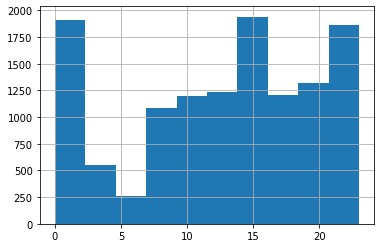

In [5]:
df = pd.read_csv('ps-'+filename)
print(df['hour'].value_counts())

print(df['retweet'].value_counts())

df['hour'].hist()
df.sample(frac=0.1, replace=False, random_state=2).to_csv('10% sample.csv') #random sampling 5% without replacement with random state 2

In [8]:
list(df.columns)


['Unnamed: 0',
 'Unnamed: 0.1',
 'Unnamed: 0.1.1',
 'id',
 'conversation_id',
 'created_at',
 'date',
 'timezone',
 'place',
 'tweet',
 'language',
 'hashtags',
 'cashtags',
 'user_id',
 'user_id_str',
 'username',
 'name',
 'day',
 'hour',
 'link',
 'urls',
 'photos',
 'video',
 'thumbnail',
 'retweet',
 'nlikes',
 'nreplies',
 'nretweets',
 'quote_url',
 'search',
 'near',
 'geo',
 'source',
 'user_rt_id',
 'user_rt',
 'retweet_id',
 'reply_to',
 'retweet_date',
 'translate',
 'trans_src',
 'trans_dest',
 'clean_tw',
 'reply',
 'length']

In [13]:
df = pd.read_csv('sample-original.csv')
df = df[2018:]
df = df[df['language'] == 'en']

df.head(200).to_csv('200.csv')



/Users/marxw/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
